<a href="https://colab.research.google.com/github/Nileshkl/Capstone-Project-EDA-Airbnb/blob/main/Nilesh's_Individual_EDA_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**Nileshkumar Lavand
##### **Team Member 2 -**Abhishek Kulkarni
##### **Team Member 3 -**Animesh Mahajan
##### **Team Member 4 -**Prajwal Kulkarni

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




**BUSINESS PROBLEM OVERVIEW**

The problem at hand is to explore and analyze a dataset containing approximately 49,000 observations from Airbnb listings. The dataset consists of 16 columns with a mix of categorical and numeric values. The goal is to extract key insights and understandings from the data that can be utilized for various purposes, such as enhancing security measures, making informed business decisions, understanding customer and host behavior and performance on the platform, guiding marketing initiatives, and potentially implementing innovative additional services.



```
# This is formatted as code
```

#### **Define Your Business Objective?**


The business objective of analyzing the Airbnb dataset is to extract insights that inform pricing optimization, enhance customer understanding, evaluate host performance, identify growth opportunities, and guide marketing strategies for business growth and customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset

file_path = "https://raw.githubusercontent.com/Nileshkl/Capstone-Project-EDA-Airbnb/main/Airbnb%20NYC%202019.csv"
airbnb_df=pd.read_csv(file_path)


### Dataset First View

In [ ]:
# Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('\n Number of Rows : ',airbnb_df.shape[0])
print('\n Number of Columns :', airbnb_df.shape[1])


 Number of Rows :  48895

 Number of Columns : 16


### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=airbnb_df.duplicated().sum()
print("No of duplicate values are :",duplicate_count)

No of duplicate values are : 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Dealing with null values**: There are two ways of dealing with null values, one is deleting the null vlaues and the other is to impute the null values with some meaningfull values.

In this case I will just delete the null values because they are not many and deleting them will not affect the trends much.

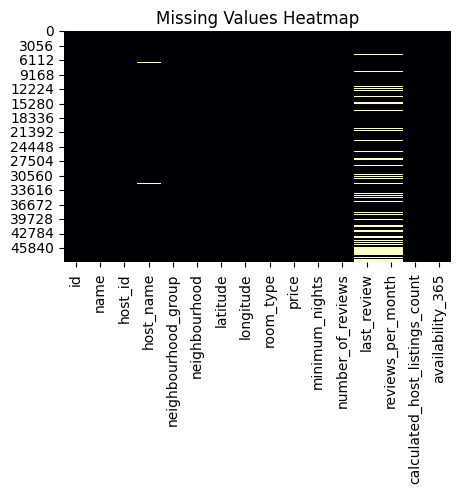

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5, 3))
sns.heatmap(airbnb_df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()


name         0
host_name    0
dtype: int64

### What did you know about your dataset?

1. Columns like name ,host_name ,last_review and review_per_month have missing values .

2. Columns like host_name ,name and last_reviews are not important , therefore we can drop these columns.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

**VARIABLES INFO**

**Listing_id** :- This is a unique identifier for each listing in the dataset.

**Listing_name** :- This is the name or title of the listing, as it appears on the Airbnb website.

**Host_id** :- This is a unique identifier for each host in the dataset.

**Host_name** :- This is the name of the host as it appears on the Airbnb website.

**Neighbourhood_group** :- This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**Neighbourhood** :- This is the specific neighborhood in which the listing is located.

**Latitude** :- This is the geographic latitude of the listing.

**Longitude** :- This is the geographic longitude of the listing.

**Room_type** :- This is the type of room or property being offered, such as an entire home, private room, shared room.

**Price** :- This is the nightly price for the listing, in US dollars.

**Minimum_nights** :- This is the minimum number of nights that a guest must stay at the listing.

**Total_reviews** :- This is the total number of reviews that the listing has received.

**Reviews_per_month** :- This is the average number of reviews that the listing receives per month.

**Host_listings_count** :- This is the total number of listings that the host has on Airbnb.

**Availability_365** :- This is the number of days in the next 365 days that the listing is available for booking.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in airbnb_df.columns:
  print("Unique values in ",i,"is : ",airbnb_df[i].nunique())

Unique values in  id is :  48895
Unique values in  name is :  47906
Unique values in  host_id is :  37457
Unique values in  host_name is :  11453
Unique values in  neighbourhood_group is :  5
Unique values in  neighbourhood is :  221
Unique values in  latitude is :  19048
Unique values in  longitude is :  14718
Unique values in  room_type is :  3
Unique values in  price is :  674
Unique values in  minimum_nights is :  109
Unique values in  number_of_reviews is :  394
Unique values in  last_review is :  1764
Unique values in  reviews_per_month is :  937
Unique values in  calculated_host_listings_count is :  47
Unique values in  availability_365 is :  366


## 3. ***Data Wrangling***

### Data Wrangling Code


**Note** - price column is very important so we have to find big outliers in important columns first.

In [ ]:
# Here name and host_name are not that much of null values, 
# So first we are good to fill those with some substitutes in both the columns first.
airbnb_df['name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)

# So null values are removed
airbnb_df[['name','host_name']].isnull().sum()

name         0
host_name    0
dtype: int64

In [ ]:
airbnb_df.drop(['last_review'], axis=1,inplace=True)

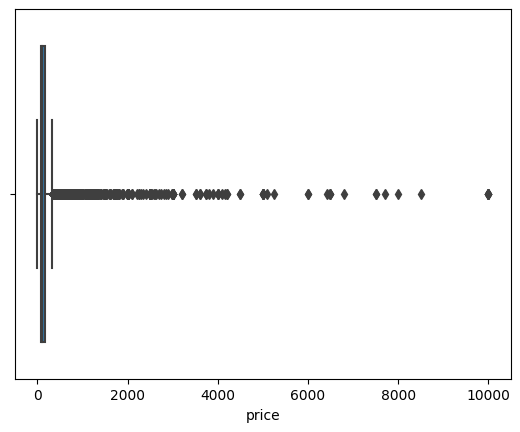

In [ ]:
# Write your code to make your dataset analysis ready.
sns.boxplot(x = airbnb_df['price'])
plt.show()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***